<a href="https://colab.research.google.com/github/Muthu2312/The_Sparks_Foundation/blob/main/Timeline_Analysis_Covid_19.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

In [2]:
df = pd.read_csv ("/content/drive/MyDrive/The Sparks Foundation/Timeline_Analysis-Covid_19/owid-covid-data.csv")

In [3]:
df.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-02-24,5.0,5.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-02-25,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-02-26,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-02-27,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-02-28,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178573 entries, 0 to 178572
Data columns (total 67 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   iso_code                                    178573 non-null  object 
 1   continent                                   168110 non-null  object 
 2   location                                    178573 non-null  object 
 3   date                                        178573 non-null  object 
 4   total_cases                                 172185 non-null  float64
 5   new_cases                                   172013 non-null  float64
 6   new_cases_smoothed                          170844 non-null  float64
 7   total_deaths                                154038 non-null  float64
 8   new_deaths                                  154057 non-null  float64
 9   new_deaths_smoothed                         152910 non-null  float64
 

In [5]:
df.describe()

,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,...,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
count,1.721850e+05,1.720130e+05,1.708440e+05,1.540380e+05,154057.000000,152910.000000,171388.000000,171216.000000,170052.000000,153254.000000,...,111837.000000,110304.000000,72452.000000,130568.000000,166950.000000,143815.000000,6.078000e+03,6078.000000,6078.000000,6078.000000
mean,2.864761e+06,1.241607e+04,1.242398e+04,6.085190e+04,166.549212,167.477627,34616.070632,181.672430,181.428443,544.624054,...,10.650212,32.786202,50.845350,3.027775,73.669086,0.725424,3.899161e+04,9.582009,15.804225,1035.395150
std,1.778968e+07,8.873116e+04,8.707835e+04,3.182164e+05,815.605260,798.660190,63579.148458,748.994155,576.935409,825.894116,...,10.588043,13.523548,31.810336,2.447029,7.464781,0.149848,1.088362e+05,16.258235,29.521194,1482.622037
min,1.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000,0.000000,0.001000,0.000000,0.000000,0.000000,...,0.100000,7.700000,1.188000,0.100000,53.280000,0.394000,-3.772610e+04,-28.450000,-95.920000,-1826.595723
25%,2.315000e+03,1.000000e+00,6.857000e+00,8.500000e+01,0.000000,0.143000,680.921000,0.025000,1.595000,20.342000,...,1.900000,21.600000,20.859000,1.300000,69.590000,0.602000,-4.415000e+01,-0.450000,-0.560000,-18.981390
50%,3.042300e+04,7.800000e+01,1.065710e+02,8.360000e+02,2.000000,2.429000,5364.533000,11.195000,19.236500,145.637000,...,6.300000,31.400000,49.839000,2.400000,75.090000,0.743000,3.585550e+03,6.300000,7.380000,512.797169
75%,3.348360e+05,1.074000e+03,1.172607e+03,7.862000e+03,19.000000,20.857000,43307.419750,103.696250,126.158250,780.954250,...,19.300000,41.300000,82.502000,4.000000,79.190000,0.845000,2.639225e+04,14.640000,22.465000,1699.146464
max,5.019188e+08,4.089026e+06,3.436980e+06,6.189593e+06,18144.000000,14783.286000,706541.904000,51427.491000,16052.608000,6370.855000,...,44.000000,78.100000,100.000000,13.800000,86.750000,0.957000,1.163660e+06,111.010000,375.000000,9573.960130


In [6]:
df.shape

(178573, 67)

In [7]:
df.isna().sum()

iso_code                                        0
continent                                   10463
location                                        0
date                                            0
total_cases                                  6388
                                            ...  
human_development_index                     34758
excess_mortality_cumulative_absolute       172495
excess_mortality_cumulative                172495
excess_mortality                           172495
excess_mortality_cumulative_per_million    172495
Length: 67, dtype: int64

In [8]:
df_a=df[df["date"]=="2020-11-15"]
df_a=df_a[~df_a["location"].isin(["World","International"])]
print(df_a.head())

      iso_code continent     location        date  total_cases  new_cases  \
265        AFG      Asia  Afghanistan  2020-11-15      43035.0       66.0   
1056  OWID_AFR       NaN       Africa  2020-11-15    1976005.0    12560.0   
1835       ALB    Europe      Albania  2020-11-15      27830.0      597.0   
2614       DZA    Africa      Algeria  2020-11-15      67679.0      860.0   
3388       AND    Europe      Andorra  2020-11-15       5872.0      147.0   

      new_cases_smoothed  total_deaths  new_deaths  new_deaths_smoothed  ...  \
265              143.143        1605.0        10.0                7.000  ...   
1056           13306.429       47362.0       296.0              286.000  ...   
1835             517.714         623.0        11.0                9.143  ...   
2614             804.000        2154.0        15.0               15.143  ...   
3388              69.857          76.0         1.0                0.143  ...   

      female_smokers  male_smokers  handwashing_faciliti

In [9]:
map = px.choropleth(df_a, locations="iso_code", color="total_cases", hover_name='location', color_continuous_scale=["#28B463","#F7DC6F","#CB4335"],title="Total Cases of Covid19 in the World")

map.show()

In [10]:
df.columns

Index(['iso_code', 'continent', 'location', 'date', 'total_cases', 'new_cases',
       'new_cases_smoothed', 'total_deaths', 'new_deaths',
       'new_deaths_smoothed', 'total_cases_per_million',
       'new_cases_per_million', 'new_cases_smoothed_per_million',
       'total_deaths_per_million', 'new_deaths_per_million',
       'new_deaths_smoothed_per_million', 'reproduction_rate', 'icu_patients',
       'icu_patients_per_million', 'hosp_patients',
       'hosp_patients_per_million', 'weekly_icu_admissions',
       'weekly_icu_admissions_per_million', 'weekly_hosp_admissions',
       'weekly_hosp_admissions_per_million', 'total_tests', 'new_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand',
       'positive_rate', 'tests_per_case', 'tests_units', 'total_vaccinations',
       'people_vaccinated', 'people_fully_vaccinated', 'total_boosters',
       'new_vaccinations', 'new_vaccinations_smoothed',
       't

In [11]:
df.location.unique()

array(['Afghanistan', 'Africa', 'Albania', 'Algeria', 'Andorra', 'Angola',
       'Anguilla', 'Antigua and Barbuda', 'Argentina', 'Armenia', 'Aruba',
       'Asia', 'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain',
       'Bangladesh', 'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin',
       'Bermuda', 'Bhutan', 'Bolivia', 'Bonaire Sint Eustatius and Saba',
       'Bosnia and Herzegovina', 'Botswana', 'Brazil',
       'British Virgin Islands', 'Brunei', 'Bulgaria', 'Burkina Faso',
       'Burundi', 'Cambodia', 'Cameroon', 'Canada', 'Cape Verde',
       'Cayman Islands', 'Central African Republic', 'Chad', 'Chile',
       'China', 'Colombia', 'Comoros', 'Congo', 'Cook Islands',
       'Costa Rica', "Cote d'Ivoire", 'Croatia', 'Cuba', 'Curacao',
       'Cyprus', 'Czechia', 'Democratic Republic of Congo', 'Denmark',
       'Djibouti', 'Dominica', 'Dominican Republic', 'Ecuador', 'Egypt',
       'El Salvador', 'Equatorial Guinea', 'Eritrea', 'Estonia',
       'Eswatini', 'Ethi

In [12]:
max_new_cases=df_a.sort_values("new_cases", ascending=False)

In [13]:
max_new_cases

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
70527,OWID_HIC,NaN,High income,2020-11-15,24077753.0,313801.0,368277.714,548443.0,3186.0,4644.571,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
52278,OWID_EUR,NaN,Europe,2020-11-15,13986149.0,213412.0,260923.571,323494.0,3005.0,4232.571,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
118724,OWID_NAM,NaN,North America,2020-11-15,13111299.0,150075.0,163156.429,371712.0,1137.0,1791.857,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
53090,OWID_EUN,NaN,European Union,2020-11-15,9361741.0,145295.0,186335.286,215490.0,2160.0,3030.286,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
168515,USA,North America,United States,2020-11-15,11087354.0,139717.0,149039.429,246071.0,767.0,1157.857,...,19.1,24.6,NaN,2.77,78.86,0.926,321532.4,12.56,22.10,965.809076
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88357,LAO,Asia,Laos,2020-11-15,24.0,0.0,0.000,NaN,NaN,NaN,...,7.3,51.2,49.839,1.50,67.92,0.613,NaN,NaN,NaN,NaN
65480,GUM,Oceania,Guam,2020-11-15,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,80.07,NaN,NaN,NaN,NaN,NaN
120559,MNP,Oceania,Northern Mariana Islands,2020-11-15,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,76.74,NaN,NaN,NaN,NaN,NaN
130849,PRI,North America,Puerto Rico,2020-11-15,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,80.10,NaN,1346.6,5.13,8.98,476.125486


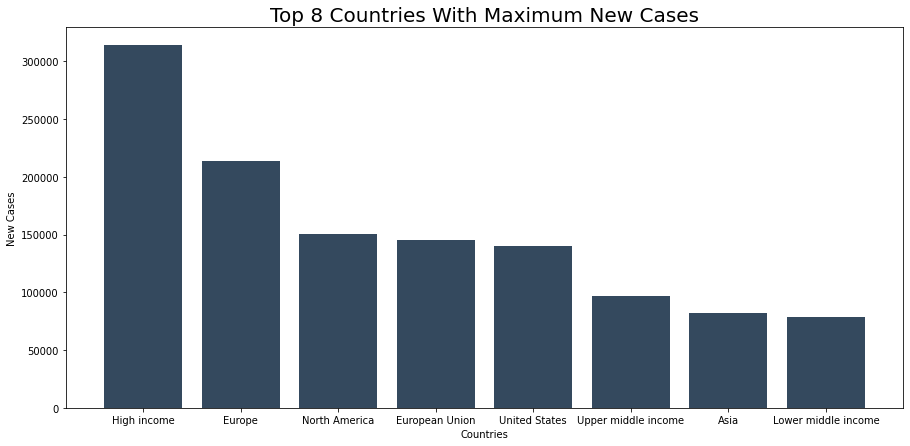

In [14]:
max_new_cases=df_a.sort_values("new_cases", ascending=False)
fig=plt.figure(figsize=(15,7))
plt.bar(max_new_cases["location"][:8],max_new_cases["new_cases"][:8],color="#34495E")
plt.xlabel("Countries")
plt.ylabel("New Cases")
plt.title("Top 8 Countries With Maximum New Cases",fontsize=20)
plt.show()

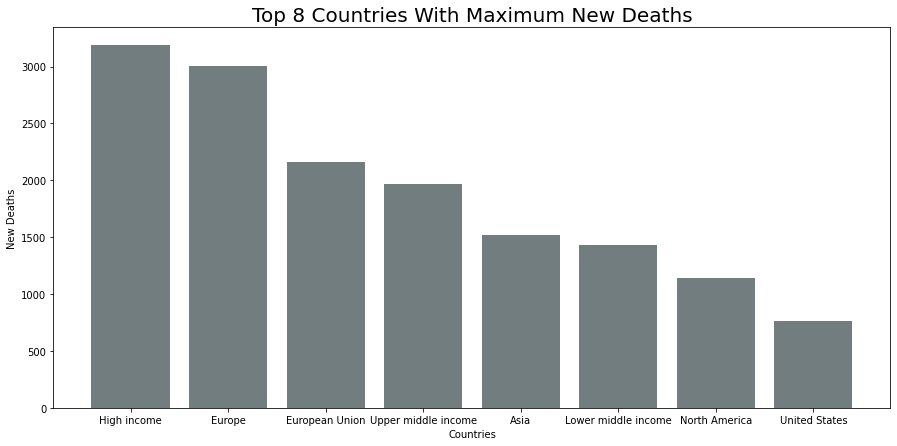

In [15]:
max_new_deaths=df_a.sort_values("new_deaths",ascending=False)
fig=plt.figure(figsize=(15,7))
plt.bar(max_new_deaths["location"][:8],max_new_deaths["new_deaths"][:8],color="#717D7E")
plt.xlabel("Countries")
plt.ylabel("New Deaths")
plt.title("Top 8 Countries With Maximum New Deaths",fontsize=20)
plt.show()

In [16]:
max_new_cases.tail(5)
max_new_deaths.tail(5)

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
159910,TLS,Asia,Timor,2020-11-15,30.0,0.0,0.000,NaN,NaN,NaN,...,6.3,78.1,28.178,5.9,69.50,0.606,NaN,NaN,NaN,NaN
169266,VIR,North America,United States Virgin Islands,2020-11-15,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,80.58,NaN,NaN,NaN,NaN,NaN
172115,VUT,Oceania,Vanuatu,2020-11-15,1.0,0.0,0.143,NaN,NaN,NaN,...,2.8,34.5,25.209,NaN,70.47,0.609,NaN,NaN,NaN,NaN
172884,VAT,Europe,Vatican,2020-11-15,27.0,0.0,0.000,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,75.12,NaN,NaN,NaN,NaN,NaN
174999,WLF,Oceania,Wallis and Futuna,2020-11-15,1.0,0.0,0.000,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,79.94,NaN,NaN,NaN,NaN,NaN


In [17]:
asia_data=df_a[df_a["continent"]=="Asia"]
asia_data=asia_data[~asia_data.isin(["World","International"])]
print(asia_data.head())

      iso_code continent     location        date  total_cases  new_cases  \
265        AFG      Asia  Afghanistan  2020-11-15      43035.0       66.0   
7287       ARM      Asia      Armenia  2020-11-15     117337.0     1482.0   
11226      AZE      Asia   Azerbaijan  2020-11-15      75688.0     2259.0   
12765      BHR      Asia      Bahrain  2020-11-15      84703.0      180.0   
13532      BGD      Asia   Bangladesh  2020-11-15     432333.0     1837.0   

       new_cases_smoothed  total_deaths  new_deaths  new_deaths_smoothed  ...  \
265               143.143        1605.0        10.0                7.000  ...   
7287             1559.000        1763.0        25.0               29.143  ...   
11226            1468.143         967.0        21.0               18.143  ...   
12765             178.143         334.0         1.0                0.714  ...   
13532            1727.857        6194.0        21.0               18.143  ...   

       female_smokers  male_smokers  handwashing_f

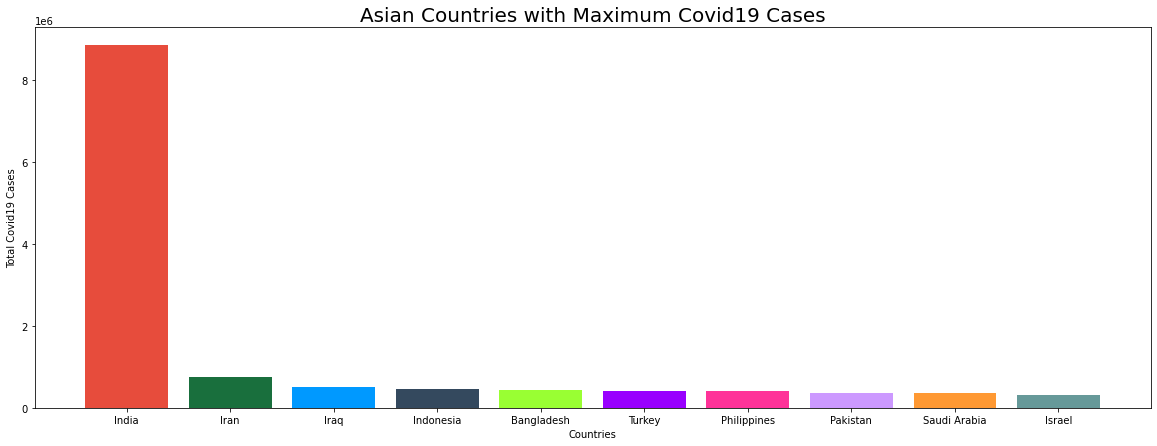

In [18]:
asia_max_cases=asia_data.sort_values("total_cases",ascending=False)
fig=plt.figure(figsize=(20,7))
plt.bar(asia_max_cases["location"][:10],asia_max_cases["total_cases"][:10],color=["#e74c3c","#196f3d","#0099ff","#34495e","#99ff33","#9900ff","#ff3399","#cc99ff","#ff9933","#669999"])
plt.xlabel("Countries")
plt.ylabel("Total Covid19 Cases")
plt.title("Asian Countries with Maximum Covid19 Cases",fontsize=20)
plt.show()

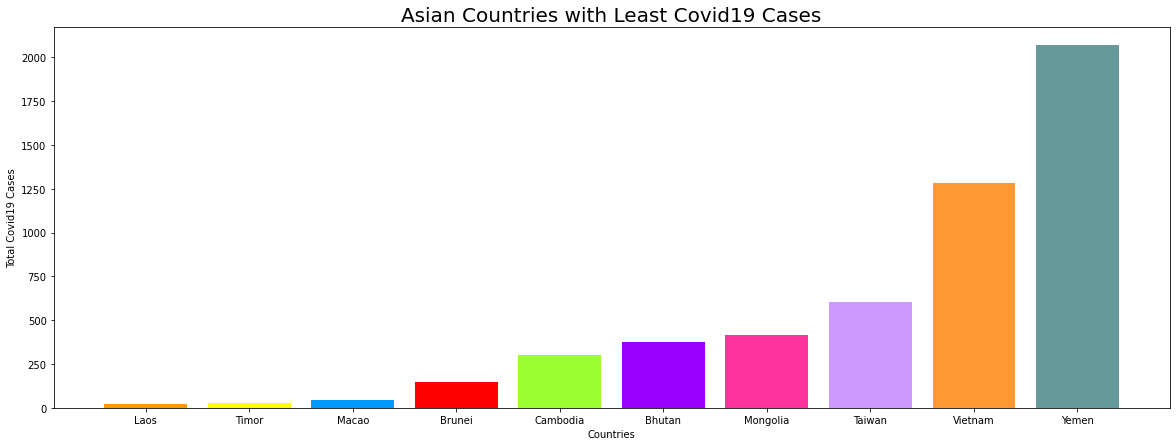

In [19]:
asia_least_cases=asia_data.sort_values("total_cases",ascending=True)
fig=plt.figure(figsize=(20,7))
plt.bar(asia_least_cases["location"][:10],asia_least_cases["total_cases"][:10],color=["#ff9900","#ffff00","#0099ff","#ff0000","#99ff33","#9900ff","#ff3399","#cc99ff","#ff9933","#669999"])
plt.xlabel("Countries")
plt.ylabel("Total Covid19 Cases")
plt.title("Asian Countries with Least Covid19 Cases",fontsize=20)
plt.show()

In [20]:
df_asia=asia_data[["date","total_cases","new_cases","total_deaths","new_tests","total_tests",
                  "location",'new_deaths_per_million','total_tests_per_thousand','new_tests_per_thousand',
                  'positive_rate','new_deaths']]
df_asia.head()

,date,total_cases,new_cases,total_deaths,new_tests,total_tests,location,new_deaths_per_million,total_tests_per_thousand,new_tests_per_thousand,positive_rate,new_deaths
265,2020-11-15,43035.0,66.0,1605.0,NaN,NaN,Afghanistan,0.251,NaN,NaN,NaN,10.0
7287,2020-11-15,117337.0,1482.0,1763.0,1550.0,465551.0,Armenia,8.423,156.850,0.522,0.4270,25.0
11226,2020-11-15,75688.0,2259.0,967.0,NaN,NaN,Azerbaijan,2.054,NaN,NaN,NaN,21.0
12765,2020-11-15,84703.0,180.0,334.0,8805.0,1894421.0,Bahrain,0.572,1083.582,5.036,0.0176,1.0
13532,2020-11-15,432333.0,1837.0,6194.0,14060.0,2542030.0,Bangladesh,0.126,15.285,0.085,0.1227,21.0


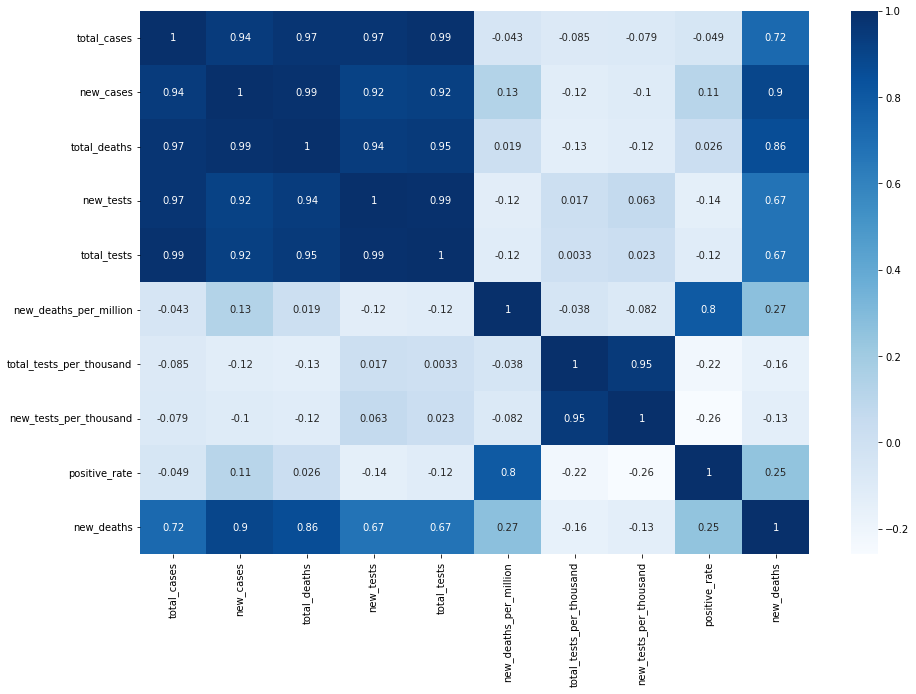

In [21]:
fig=plt.figure(figsize=(15,10))

sns.heatmap(df_asia.corr(),cmap="Blues",annot=True)

Text(0.5, 1.0, 'Total Cases vs Total Deaths')

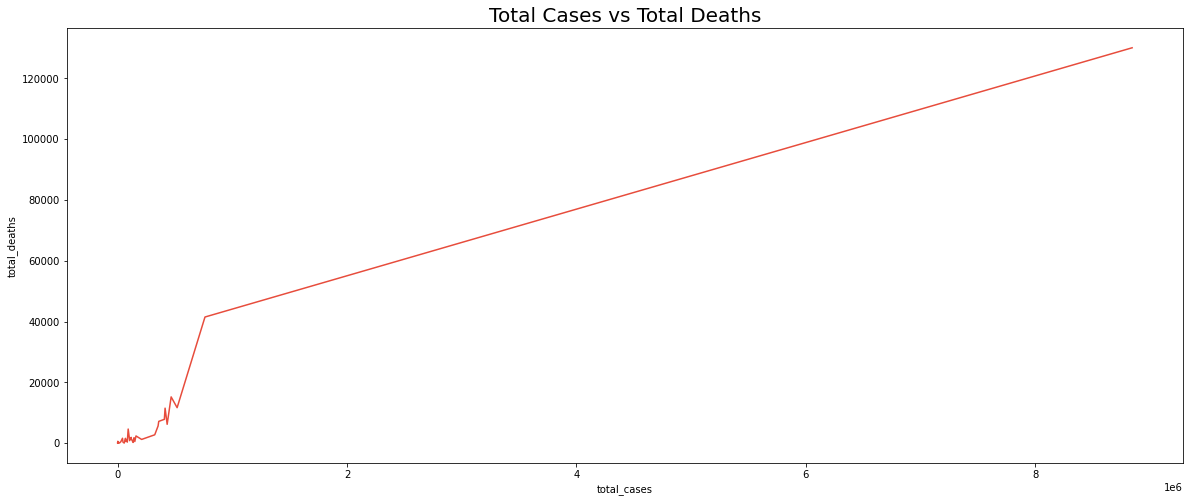

In [22]:
plt.figure(figsize=(20,8))
sns.lineplot(x='total_cases',y='total_deaths',data=df_asia,color="#E74C3C")
plt.title("Total Cases vs Total Deaths",fontsize=20)

Text(0.5, 1.0, 'Total Tests vs Positive Rate')

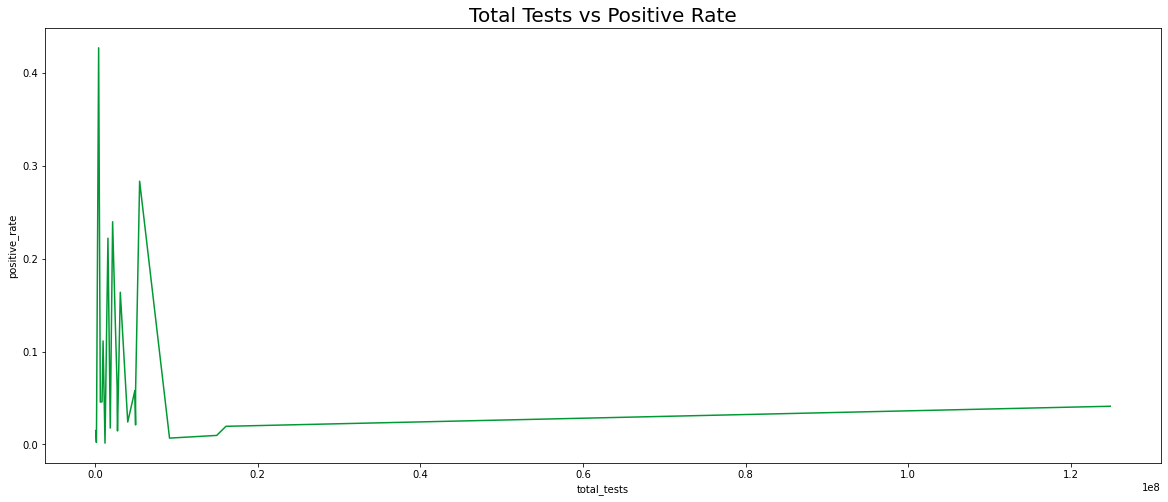

In [23]:
plt.figure(figsize=(20,8))
sns.lineplot(x='total_tests',y='positive_rate',data=df_asia,color="#009933")
plt.title("Total Tests vs Positive Rate",fontsize=20)


From the above graph, it is observed that as the number of testing increase, there is gradual increase in covid19 positive patients

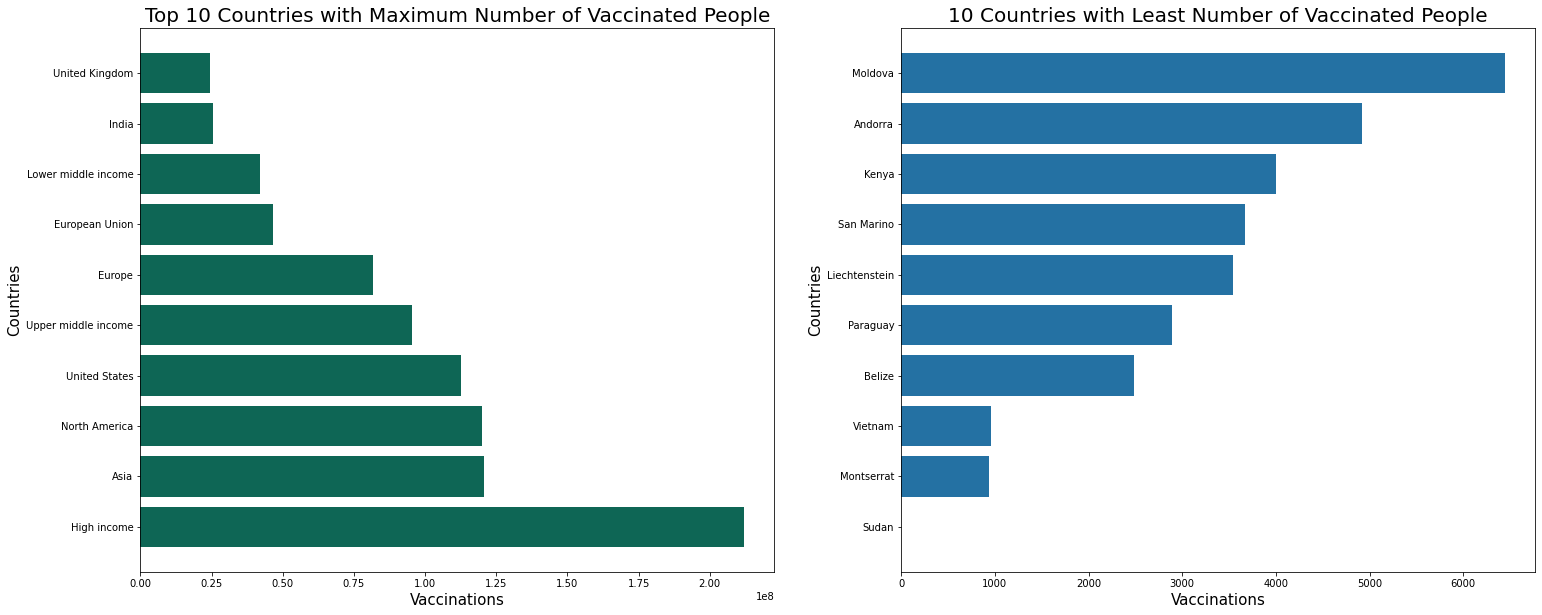

In [24]:
#Subplot of countries with maximum vaccinated people and least number of vaccinated people
vaccination_data=df[df["date"]=="2021-03-10"]
vaccination_data=vaccination_data[~vaccination_data["location"].isin(["World","International"])]
max_vaccinated=vaccination_data.sort_values("total_vaccinations",ascending= False)
least_vaccinated=vaccination_data.sort_values("total_vaccinations",ascending= True)
fig=plt.figure(figsize=(25,10))
plt.subplot(1,2,1)
plt.barh(max_vaccinated["location"][:10],max_vaccinated["total_vaccinations"][:10],color="#0E6655")
plt.title("Top 10 Countries with Maximum Number of Vaccinated People",fontsize=20)
plt.xlabel("Vaccinations",fontsize=15)
plt.ylabel("Countries",fontsize=15)
plt.subplot(1,2,2)
plt.barh(least_vaccinated["location"][:10],least_vaccinated["total_vaccinations"][:10],color="#2471A3")
plt.title("10 Countries with Least Number of Vaccinated People", fontsize=20)
plt.xlabel("Vaccinations",fontsize=15)
plt.ylabel("Countries",fontsize=15)

plt.show()

From graph 1, we can infer that United States is having the Maximum number of Vaccinated population followed by other nine countries. And From graph 2, it is observed that Belize is having least number of vaccinated population followed by other countries